# 머신러닝 코드 정리

In [1]:
# 라이브러리 임포트
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
# 데이터 가져오기
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/breast_cancer.csv"
df = pd.read_csv(url, index_col=0)

x = df.drop('label', axis=1)
y = df['label']

# 스케일링
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


## 1. Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
ly_preds = model.predict(x_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.06317331396076088
평균제곱근오차 0.06317331396076088
평균제곱근오차 0.06317331396076087


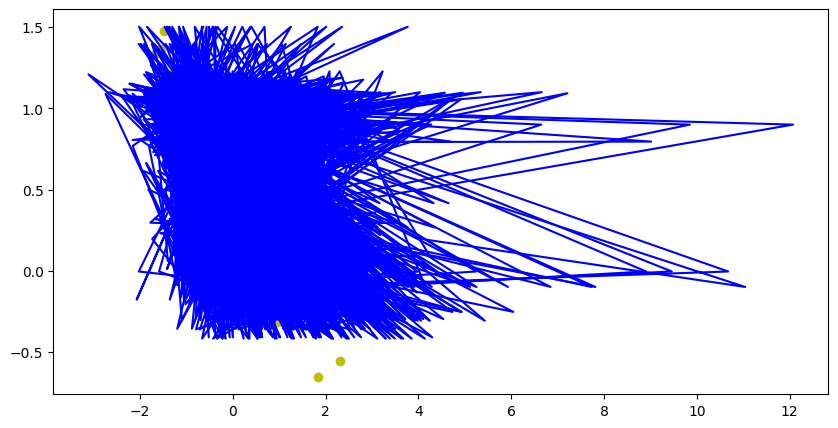

In [18]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(x_test[:, 0], y_test, label='y_test')
plt.scatter(x_test[:, 0], ly_preds, c='y', label='ly_preds')
plt.plot(x_train, model.predict(x_train), color='blue')
plt.show()         

## Decision Tree

평균제곱근오차 0.07692307692307693


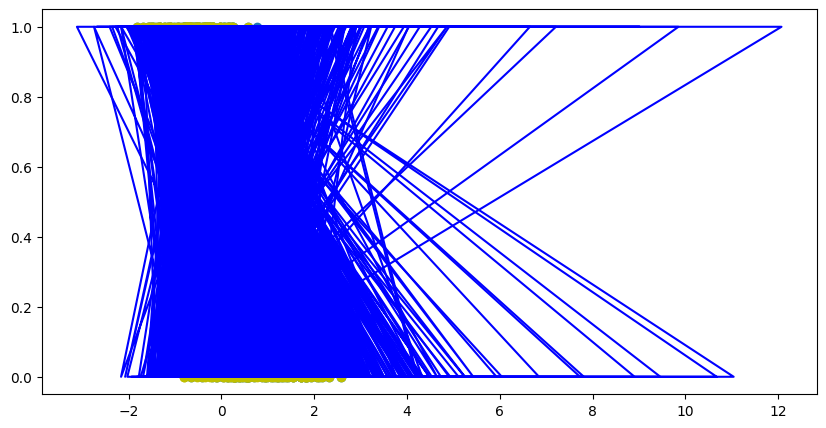

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

dy_preds = model.predict(x_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(x_test[:, 0], y_test, label='y_test')
plt.scatter(x_test[:, 0], dy_preds, c='y', label='dy_preds')
plt.plot(x_train, model.predict(x_train), color='blue')
plt.show()

## Random Forest

평균제곱근오차 0.027623776223776226


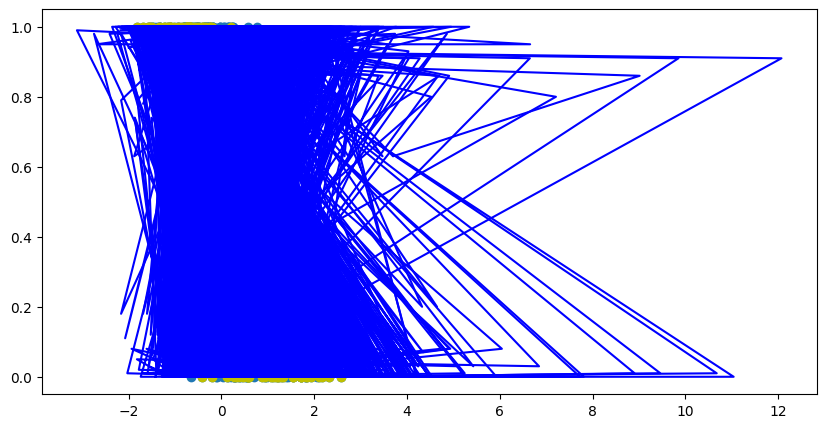

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

ry_preds = model.predict(x_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(x_test[:, 0], y_test, label='y_test')
plt.scatter(x_test[:, 0], ry_preds, c='y', label='ry_preds')
plt.plot(x_train, model.predict(x_train), color='blue')
plt.show()

## Support Vector Machine

평균제곱근오차 0.06581103758983449


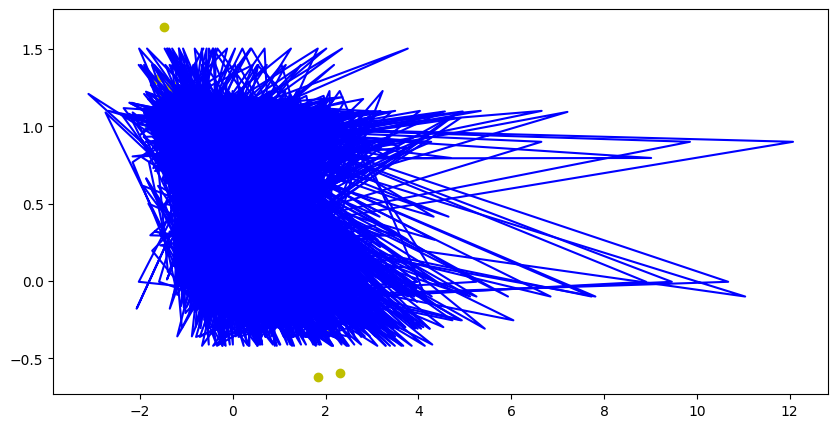

In [26]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(x_train, y_train)

sy_preds = model.predict(x_test)
print('평균제곱근오차', mean_squared_error(sy_preds, y_test))

plt.figure(figsize=(10,5))
plt.scatter(x_test[:, 0], y_test, label='y_test')
plt.scatter(x_test[:, 0], sy_preds, c='y', label='sy_preds')
plt.plot(x_train, model.predict(x_train), color='blue')
plt.show()